In [1]:
from lineagegrn.plot.analysis_result import *
from lineagegrn.downstream_analysis import *
from lineagegrn.utils.constant import *
from lineagegrn.utils.synthetic_data_generation import *
from lineagegrn.cell_fate_map import *
from lineagegrn.gene_regulatory_network import*
from lineagegrn.utils.metrics import *

### Inferring dynamic gene regulatory networks

In [109]:
regulator_names = list(pd.read_csv('examples/data/C.elegans/C.elegans_Core/additional_input_data/regulatory_genes_name.csv', index_col=0).iloc[:,0])
target_gene_names = list(pd.read_csv('examples/data/C.elegans/C.elegans_Core/additional_input_data/target_genes_name.csv', index_col=0).iloc[:,0])
regulator_names = sorted(regulator_names, key=lambda s: s.lower())
target_gene_names = sorted(target_gene_names, key=lambda s: s.lower())

#ABpl
atac_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/ABpl/atac_data.csv"
expression_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/ABpl/expression_data.csv"
fate_map_path = 'examples/data/C.elegans/C.elegans_Core/input_data/ABpl/edge_dict_ABpl.csv'
saved_dir = 'examples/results/C.elegans/C.elegans_Core/ABpl'
edge_dict = load_fate_map_topology(fate_map_path)
edge = parse_edge_dict(edge_dict)
fate_map = FateMap(edge)
grn_inference_result = GRNInference(atac_file_path, expression_file_path, fate_map, saved_dir)
grn_inference_result.infer_grn(20)
#target_networks_dict = grn_inference_result.get_target_networks(0)
#dynamic_networks_dict = get_dynamic_networks(saved_dir, fate_map, 0.1, regulator_names, target_gene_names)

# #ABpr
atac_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/ABpr/atac_data.csv"
expression_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/ABpr/expression_data.csv"
fate_map_path = 'examples/data/C.elegans/C.elegans_Core/input_data/ABpr/edge_dict_ABpr.csv'
saved_dir = 'examples/results/C.elegans/C.elegans_Core/ABpr'
edge_dict = load_fate_map_topology(fate_map_path)
edge = parse_edge_dict(edge_dict)
fate_map = FateMap(edge)
grn_inference_result = GRNInference(atac_file_path, expression_file_path, fate_map, saved_dir)
grn_inference_result.infer_grn(20)
#target_networks_dict = grn_inference_result.get_target_networks(0)
#dynamic_networks_dict = get_dynamic_networks(saved_dir, fate_map, 0.1, regulator_names, target_gene_names)

# #ABal
atac_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/ABal/atac_data.csv"
expression_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/ABal/expression_data.csv"
fate_map_path = 'examples/data/C.elegans/C.elegans_Core/input_data/ABal/edge_dict_ABal.csv'
saved_dir = 'examples/results/C.elegans/C.elegans_Core/ABal'
edge_dict = load_fate_map_topology(fate_map_path)
edge = parse_edge_dict(edge_dict)
fate_map = FateMap(edge)
grn_inference_result = GRNInference(atac_file_path, expression_file_path, fate_map, saved_dir)
grn_inference_result.infer_grn(20)
#target_networks_dict = grn_inference_result.get_target_networks(0)
#dynamic_networks_dict = get_dynamic_networks(saved_dir, fate_map, 0.1, regulator_names, target_gene_names)

# #P2
atac_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/P2/atac_data.csv"
expression_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/P2/expression_data.csv"
fate_map_path = 'examples/data/C.elegans/C.elegans_Core/input_data/P2/edge_dict_P2.csv'
saved_dir = 'examples/results/C.elegans/C.elegans_Core/P2'
edge_dict = load_fate_map_topology(fate_map_path)
edge = parse_edge_dict(edge_dict)
fate_map = FateMap(edge)
grn_inference_result = GRNInference(atac_file_path, expression_file_path, fate_map, saved_dir)
grn_inference_result.infer_grn(20)
#target_networks_dict = grn_inference_result.get_target_networks(0)
#dynamic_networks_dict = get_dynamic_networks(saved_dir, fate_map, 0.1, regulator_names, target_gene_names)

# #ABar
atac_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/ABar/atac_data.csv"
expression_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/ABar/expression_data.csv"
fate_map_path = 'examples/data/C.elegans/C.elegans_Core/input_data/ABar/edge_dict_ABar.csv'
saved_dir = 'examples/results/C.elegans/C.elegans_Core/ABar'
edge_dict = load_fate_map_topology(fate_map_path)
edge = parse_edge_dict(edge_dict)
fate_map = FateMap(edge)
grn_inference_result = GRNInference(atac_file_path, expression_file_path, fate_map, saved_dir)
grn_inference_result.infer_grn(20)
#target_networks_dict = grn_inference_result.get_target_networks(0)
#dynamic_networks_dict = get_dynamic_networks(saved_dir, fate_map, 0.1, regulator_names, target_gene_names)

# # #EMS
atac_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/EMS/atac_data.csv"
expression_file_path = "examples/data/C.elegans/C.elegans_Core/input_data/EMS/expression_data.csv"
fate_map_path = 'examples/data/C.elegans/C.elegans_Core/input_data/EMS/edge_dict_EMS.csv'
saved_dir = 'examples/results/C.elegans/C.elegans_Core/EMS'
edge_dict = load_fate_map_topology(fate_map_path)
edge = parse_edge_dict(edge_dict)
fate_map = FateMap(edge)
grn_inference_result = GRNInference(atac_file_path, expression_file_path, fate_map, saved_dir)
grn_inference_result.infer_grn(20)
#target_networks_dict = grn_inference_result.get_target_networks(0)
#dynamic_networks_dict = get_dynamic_networks(saved_dir, fate_map, 0.005, regulator_names, target_gene_names)

-2025-07-09 08:18:02,301-INFO-34708 Serialize node_id ABplpppp- expression data of regulator_gene
-2025-07-09 08:18:02,535-INFO-34708 Serialize node_id ABplpppp- expression data of target_gene
-2025-07-09 08:18:02,803-INFO-34708 Serialize node_id ABplpap- expression data of regulator_gene
-2025-07-09 08:18:03,103-INFO-34708 Serialize node_id ABplpap- expression data of target_gene
-2025-07-09 08:18:03,469-INFO-34708 Serialize node_id ABplpaa- expression data of regulator_gene
-2025-07-09 08:18:03,800-INFO-34708 Serialize node_id ABplpaa- expression data of target_gene
-2025-07-09 08:18:04,201-INFO-34708 Serialize node_id ABplappp- expression data of regulator_gene
-2025-07-09 08:18:04,319-INFO-34708 Serialize node_id ABplappp- expression data of target_gene
-2025-07-09 08:18:04,463-INFO-34708 Serialize node_id ABplappa- expression data of regulator_gene
-2025-07-09 08:18:04,519-INFO-34708 Serialize node_id ABplappa- expression data of target_gene
-2025-07-09 08:18:04,586-INFO-34708 Ser

### Revealing the reconfiguration pattern of inferred GRNs along cell lineages

In [80]:
regulator_dict = get_regulators_for_target_gene('nhr-25', 'Ea-', saved_dir, regulator_names)
print(regulator_dict)

{'B0310.2': 0.19406289308101562, 'ceh-16': 0.22162245944524483, 'ceh-27': 0.4464785158634186, 'ceh-32': 0.24368241163710413, 'ceh-36': 0.2254354933238567, 'die-1': 0.4464785158634186, 'dmd-4': 0.11341780222143619, 'dpl-1': 0.18556505162475365, 'egl-5': 0.2791125408763654, 'elt-1': 0.10483031374674358, 'elt-2': 0.1677233156139836, 'elt-7': 0.17940980334644752, 'end-1': 0.4464785158634186, 'end-3': 0.28570741221039797, 'eor-1': 0.4464785158634186, 'hlh-1': 0.08397229503517525, 'hlh-16': 0.49622952313027735, 'hlh-26': 0.20864964933724123, 'irx-1': 0.2283244187549371, 'lin-1': 0.2066696301315121, 'lsy-27': -0.4340407351829689, 'mab-5': -0.38805249333381653, 'mnm-2': -0.38805249333381653, 'nhr-2': -0.47148156170181754, 'nhr-23': -0.29716050267040944, 'nhr-25': -0.2590268191476794, 'nhr-67': -0.4442064381483651, 'nhr-79': -0.38805249333381653, 'nob-1': -0.38805249333381653, 'pal-1': 0.2437843309567355, 'pha-4': -0.4460623060053642, 'ref-1': -0.38805249333381653, 'ref-2': 0.0884888137977784, 

In [81]:
target_dict = get_targets_for_regulator_gene('elt-7', 'Ea-', saved_dir, regulator_names)
print(target_dict)

{'ama-1': 0.1429329671053873, 'B0310.2': 0.06137323784888388, 'B0336.3': -0.05151918227687777, 'ceh-16': -0.00017749575412264563, 'ceh-27': -0.00019974420884780598, 'ceh-43': 0.11363432614542113, 'die-1': 0.17339692756309696, 'dpl-1': -0.0002416461588341354, 'dpy-31': 0.1061528379536392, 'dpy-7': 0.05197442259202668, 'dve-1': -0.09969216380247616, 'eef-1A.1': 0.24479563867460225, 'elt-1': 0.11438250610500844, 'elt-6': 0.030500663556410155, 'elt-7': 0.0073284146538558775, 'F16B12.6': 0.05837739945808522, 'his-72': -0.09999663162224574, 'hlh-1': 0.037670177946636824, 'hmg-1.2': 0.26157147939648806, 'hmg-11': 0.3223621321505668, 'hsp-3': 0.013776457323748447, 'irx-1': 0.9999972613246656, 'isw-1': 0.0641546455933937, 'lin-1': 0.00012465082443401668, 'lin-11': 0.06191347732743873, 'lin-13': 0.06761362801313163, 'lin-26': 0.36976902538711576, 'lin-39': 0.05886019971262073, 'lir-2': 0.09870326803543311, 'mab-5': 2.8162641778873093e-05, 'mep-1': -0.01973781315692343, 'mml-1': 0.170102286143294

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id: float(target_id_node_id_grn.loc[:, regulator_id])})


In [82]:
output_path='examples/results/C.elegans/C.elegans_Core/figures/'
path = list(fate_map.nodes.keys())

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

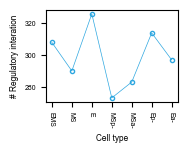

In [108]:
dynamic_networks_dict = get_dynamic_networks(saved_dir, fate_map, 0.005, regulator_names, target_gene_names)
plot_regulatory_interactions_along_fatemap(dynamic_networks_dict, path, output_path, figsize=(1.7,1.2))

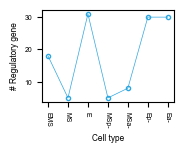

In [102]:
plot_dynamic_regulator_number(saved_dir, regulator_names, 'elt-7', path, 0.005, output_path, figsize=(1.7,1.2))

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id: float(target_id_node_id_grn.loc[:, regulator_id])})


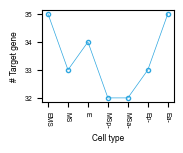

In [103]:
plot_regulatory_genes_along_fatemap(saved_dir, regulator_names, 'elt-7', path, 0.005, output_path, figsize=(1.7,1.2))

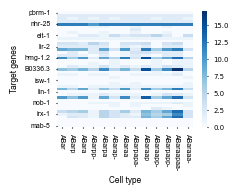

In [28]:
ordered_genes = regulatory_number_rank(target_gene_names, regulator_names, 'total', saved_dir, path, 0.1)
plot_target_genes_along_fatemap(ordered_genes, regulator_names, 'negative', saved_dir, path, 0.1, output_path)

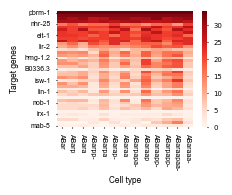

In [27]:
plot_target_genes_along_fatemap(ordered_genes, regulator_names, 'positive', saved_dir, path, 0.1, output_path)

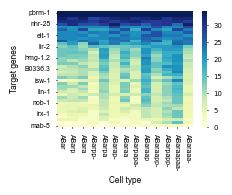

In [78]:
plot_target_genes_along_fatemap(ordered_genes, regulator_names, 'total',saved_dir, path, 0.1, output_path)

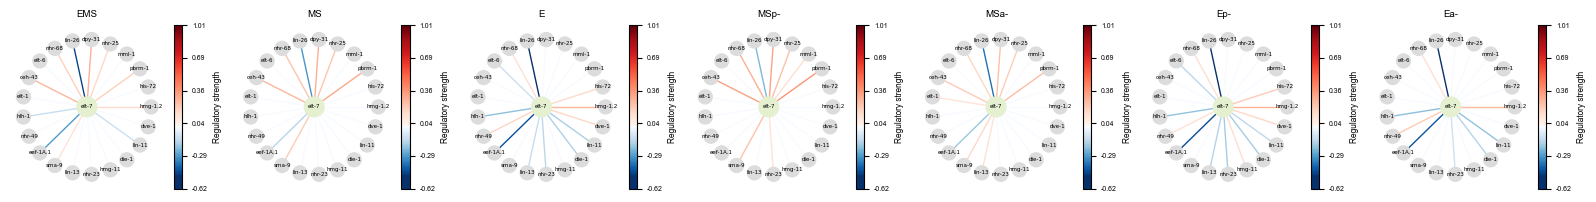

In [14]:
plot_regulatory_network_along_fatemap('elt-7', dynamic_networks_dict, path,output_path, 0.1, figsize=(16,2))

In [36]:
map_df = pd.read_csv('examples/data/C.elegans/C.elegans_Core/additional_input_data/fate_map_topology.csv')
edges_dict_Celegans = {}
    
for top_key, group in map_df .groupby("Lineage"):
    sub_dict = {f"{row['Parent']}->{row['Child']}": row['Length'] for _, row in group.iterrows()}
    edges_dict_Celegans[top_key] = sub_dict

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id: float(target_id_node_id_grn.loc[:, regulator_id])})
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id: float(target_id_node_id_grn.loc[:, regulator_id])})
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id:

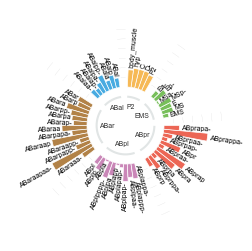

In [37]:
input_path = os.path.dirname(saved_dir)
plot_regulator_activity_across_lineages(edges_dict_Celegans, input_path, 'nhr-25', regulator_names, 0.2, output_path)

### Identifying constitutive and specific regulatory interactions

In [21]:
X, centers, weight_matrix = cluster_regulatory_interactions(saved_dir, fate_map, 0.3, regulator_names, target_gene_names, len(regulator_names),len(target_gene_names), 5, 2)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

In [22]:
edges_cluster_to_nodes = identify_regulatory_interactions_specificity(saved_dir, fate_map, 0.1, regulator_names, target_gene_names, 5, 0.3, X, len(regulator_names), len(target_gene_names), weight_matrix)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

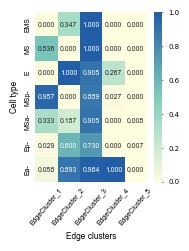

In [24]:
plot_regulatory_interactions_in_celltypes(edges_cluster_to_nodes, output_path)